# Validation of Zhu and others (2017)

In this section, we demonstrate that our implementation of the Zhu and others (2017) general model yields the same results as the publication. In this case, we have taken additional modifications to the originally published model from Baise and Rashidian (2017), which includes some additional thresholds and more extensive model validation, so we compare against a figure from Baise and Rashidian (2017) for validation. There may be slight differences due to different shakemap versions, resampling methods, or minor differences in the exact colorbars used. 

We did find in validating this model that the figures of the general model in the original paper (Zhu and others, 2017) did not match our output and after working with the authors we found that the figures were erroneous and confirmed that our implementation gave the correct outputs (see second example for Wenchuan). 

### References
Zhu, Jing, Baise, L. G., Thompson, E. M., 2017, An Updated Geospatial Liquefaction Model for Global Application, Bulletin of the Seismological Society of America, 107, p 1365-1385, doi: 0.1785/0120160198 

Baise, L.G., and Rashidian, Vahid, 2017, Validation of a Geospatial Liquefaction Model for Noncoastal Regions Including Nepal: Final Technical Report for USGS Award G16AP00014.


## Haiti earthquake



In [21]:
#stdlib imports
from configobj import ConfigObj
import os
import pprint
import numpy as np
import matplotlib

#local imports
from gfail.logisticmodel import LogisticModel
from gfail.conf import correct_config_filepaths
from gfail.utilities import parseConfigLayers, parseMapConfig
from gfail import makemaps

%pylab inline

import warnings
warnings.filterwarnings('ignore')

# Set up file paths
# Directory containing model inputs
datadir = 'data/model_inputs/haiti'
# Path to mapping inputs for static plots
map_inputs = 'data/mapping_inputs/haiti'

# Path to config files
configfileZ2 = '../defaultconfigfiles/models/zhu_2017_general.ini'
mapconfig = '../defaultconfigfiles/mapconfig.ini'

# Path to shakemap .xml files
shakefile = 'data/shakemaps/haiti.xml'

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Read in the config file for this model. This contains all of the information needed to run the model
config = ConfigObj(configfileZ2)

# append the data directory to the relative paths in the config file
config = correct_config_filepaths(datadir, config)
# View the config file
#pprint.pprint(config)

# Change to same resolution
config['zhu_2017_general']['divfactor'] = 10.

In [3]:
bounds = dict(xmin=-73.0, xmax=-71.7, ymin=17.9, ymax=19.25)

# Run the model (this will take a minute)
lmn = LogisticModel(shakefile, config, saveinputs=True, bounds=bounds)
maplayers = lmn.calculate()

Loading wtd layer: 0.3 sec
Loading dr layer: 0.3 sec
Loading precip layer: 0.3 sec
Loading dc layer: 0.2 sec
Loading vs30 layer: 0.3 sec


### Change bins to match figure from paper


In [4]:
lims = [[-0.05, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]]
colorlist = ['#97999F','#5CFD2F', '#FDFC37', '#F7A929', '#FC0D1B', '#FC0D1B']  #hex code for colors in figure below
CustomCmap = matplotlib.colors.ListedColormap(colorlist)
colormap = [CustomCmap]

maskthresh = [0.001]  # to represent gray color on figure

### Create the figure

roadfolder not valid - roads will not be displayed

cities file not valid - cities will not be displayed

No output location given, using current directory for outputs

Input boundaries are almost the same as specified boundaries, no cutting needed
Not able to read specified ocean file, will use default ocean masking


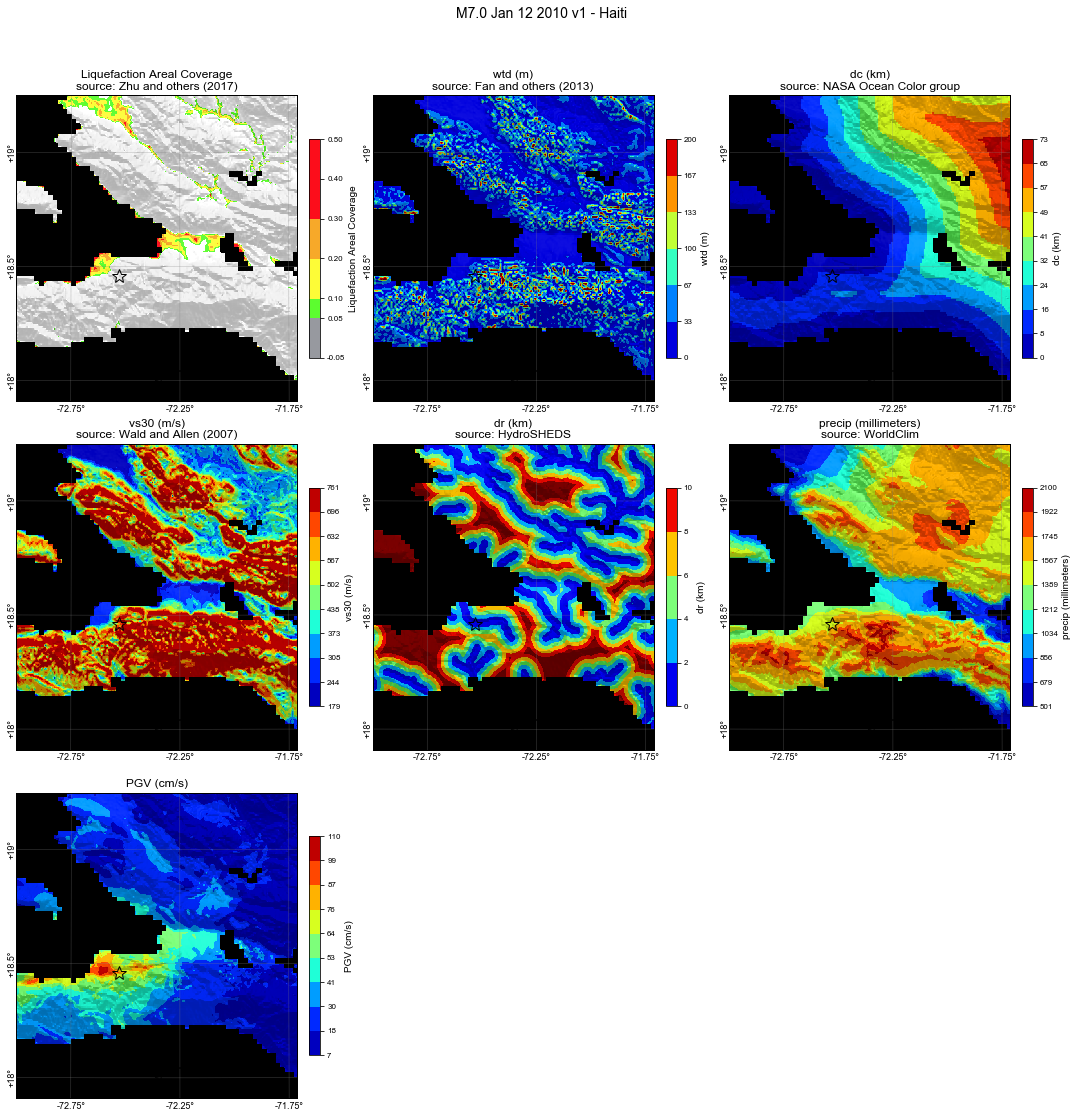

In [5]:
# read in general mapping preferences
mapconfig = ConfigObj(mapconfig)
kwargs = parseMapConfig(mapconfig, fileext=map_inputs)

# get plotting info from config for each layer
plotorder, logscale, lims1, colormaps, maskthreshes = parseConfigLayers(maplayers, config)
lims = lims + lims1[1:]
colormaps = colormap + colormaps[1:]
maskthreshes = maskthresh + maskthreshes[1:]

# Make the figure
temp = makemaps.modelMap(maplayers, shakefile, lims=lims, maskthreshes=maskthreshes, plotorder=plotorder,
         logscale=False, maproads=False, mapcities=False, showplots=True, printparam=False,
         inventory_shapefile=None, scaletype='binned', savepdf=False, savepng=False, boundaries=bounds,
         colormaps=colormaps, **kwargs)

### Compare to the result from the original paper for this event (below)
<img src="data/images/zhu2017_general_haiti.png" alt="From Paper" style="width: 500px;" align="left"/>

## Wenchuan earthquake
In this example we compare against a figure showing the general model from the original paper. Note that the result is erroneous, we can reproduce their plot if we input precipitation in units of cm instead of mm, but the authors confirmed with us that the precipitation should be in mm, that we were obtaining the correct values, and there was an error in the figure in the paper. Note that the figures show "relative hazard" whereas we typically convert to areal coverage, but we have disabled that conversion for this comparison.

Note that the input layer plots still show precipitation in mm, even though we are converting to cm in this case. This is because the input layer plots just show the original raw inputs without any modification specified by the config.

In [6]:
# Path to shakemap .xml files

# Directory containing model inputs
datadir = 'data/model_inputs/wenchuan'
# Path to mapping inputs for static plots
map_inputs = 'data/mapping_inputs/wenchuan'

shakefile = 'data/shakemaps/wenchuan.xml'

# Read in the config file for this model. This contains all of the information needed to run the model
config = ConfigObj(configfileZ2)

# append the data directory to the relative paths in the config file
config = correct_config_filepaths(datadir, config)
# View the config file
#pprint.pprint(config)

# Turn off conversion to areal coverage in config file
del config['zhu_2017_general']['coverage']

# Change to same resolution
del config['zhu_2017_general']['divfactor']

In [7]:
bounds = dict(xmin=103.5, xmax=104.5, ymin=30.5, ymax=31.5)

# Run the model (this will take a minute)
lmn = LogisticModel(shakefile, config, saveinputs=True, bounds=bounds)
maplayers = lmn.calculate()

Loading wtd layer: 0.1 sec
Loading dr layer: 0.1 sec
Loading precip layer: 0.1 sec
Loading dc layer: 0.0 sec
Loading vs30 layer: 0.0 sec


In [19]:
lims = [[0., 0.2, 0.3, 0.5, 0.6]]
colorlist = ['#DCDCDC','#FBF6A5', '#FCC14F', '#E95659']  #hex code for colors in figure below
CustomCmap = matplotlib.colors.ListedColormap(colorlist)
colormap = [CustomCmap]

roadfolder not valid - roads will not be displayed

cities file not valid - cities will not be displayed

No output location given, using current directory for outputs

Input boundaries are almost the same as specified boundaries, no cutting needed
Not able to read specified ocean file, will use default ocean masking


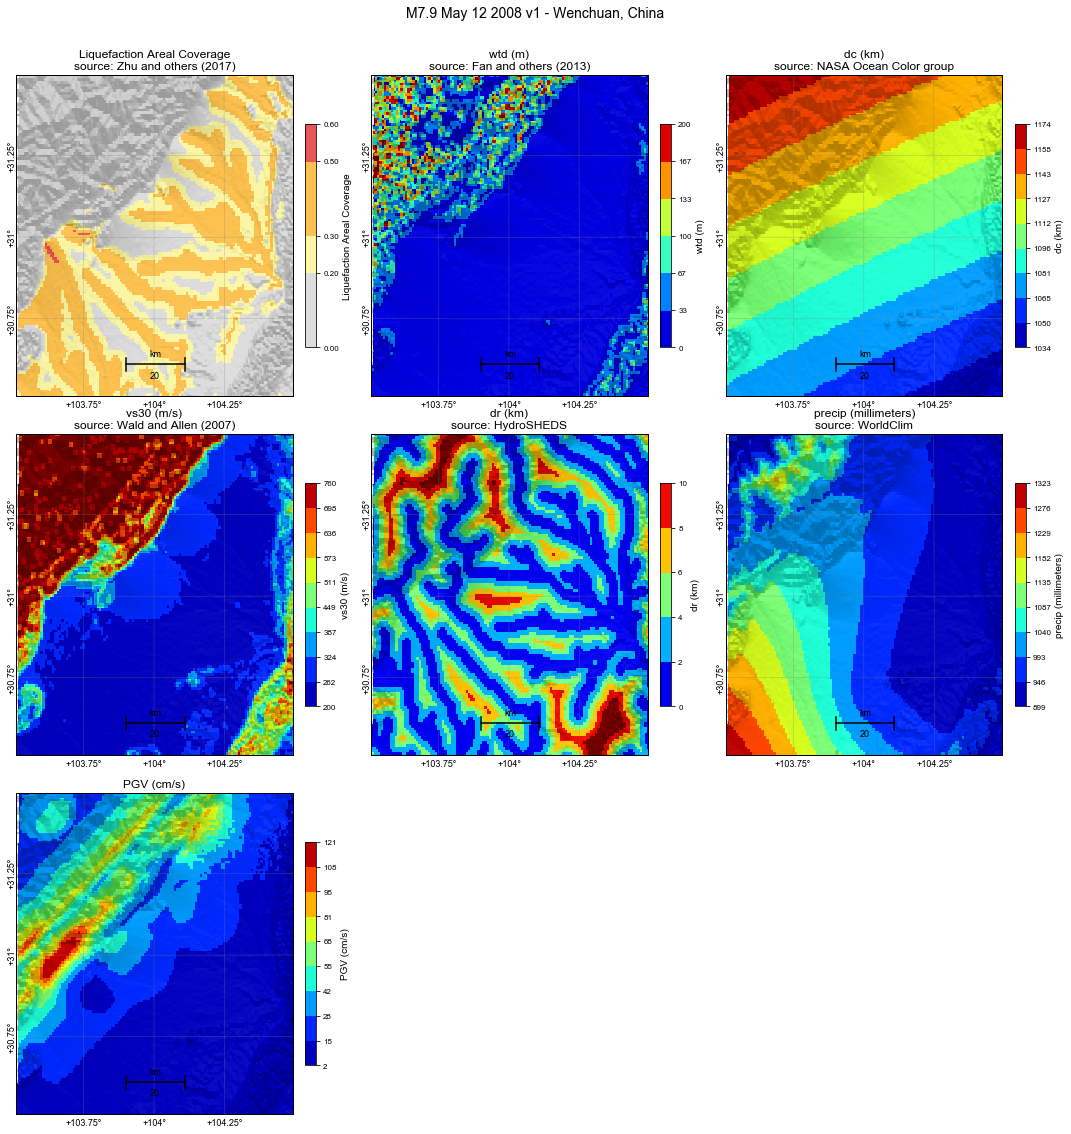

In [9]:
# read in general mapping preferences
mapconfig = ConfigObj(mapconfig)
kwargs = parseMapConfig(mapconfig, fileext=map_inputs)

# get plotting info from config for each layer
plotorder, logscale, lims1, colormaps, maskthreshes = parseConfigLayers(maplayers, config)
lims = lims + lims1[1:]
colormaps = colormap + colormaps[1:]
maskthreshes = maskthresh + maskthreshes[1:]

# Make the figure
temp = makemaps.modelMap(maplayers, shakefile, lims=lims, maskthreshes=maskthreshes, plotorder=plotorder,
         logscale=False, maproads=False, mapcities=False, showplots=True, printparam=False,
         inventory_shapefile=None, scaletype='binned', savepdf=False, savepng=False, boundaries=bounds,
         colormaps=colormaps, **kwargs)

### Compare to the result from the original paper for this event (below)
<img src="data/images/zhu2017general_wenchuan.png" alt="From Paper" style="width: 500px;" align="left"/>

### Note that if we divide precipitation by 10, it does match the original paper

Loading wtd layer: 0.0 sec
Loading dr layer: 0.0 sec
Loading precip layer: 0.0 sec
Loading dc layer: 0.0 sec
Loading vs30 layer: 0.0 sec
No output location given, using current directory for outputs

Input boundaries are almost the same as specified boundaries, no cutting needed
Not able to read specified ocean file, will use default ocean masking


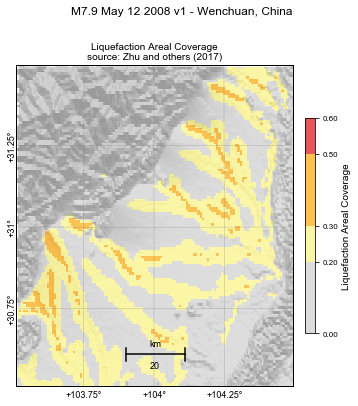

In [20]:
# Re-read in the config file for this model. This contains all of the information needed to run the model
config2 = ConfigObj(configfileZ2)

# append the data directory to the relative paths in the config file
config2 = correct_config_filepaths(datadir, config2)
# View the config file
#pprint.pprint(config)

# Turn off conversion to areal coverage in config file
del config2['zhu_2017_general']['coverage']

# Change to same resolution
del config2['zhu_2017_general']['divfactor']

config2['zhu_2017_general']['terms']['b3']='precip/10.'

# Run the model (this will take a minute)
lmn2 = LogisticModel(shakefile, config2, saveinputs=True, bounds=bounds)
maplayers2 = lmn2.calculate()

# get plotting info from config for each layer
plotorder, logscale, lims1, colormaps, maskthreshes = parseConfigLayers(maplayers, config2)
lims = lims + lims1[1:]
colormaps = colormap + colormaps[1:]
maskthreshes = maskthresh + maskthreshes[1:]

# Make the figure
temp = makemaps.modelMap(maplayers2, shakefile, lims=lims, maskthreshes=None, plotorder=['model'],
         logscale=False, maproads=True, mapcities=True, showplots=True, printparam=False,
         inventory_shapefile=None, scaletype='binned', savepdf=False, savepng=False, boundaries=bounds,
         colormaps=colormap, **kwargs)